In [30]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     
import seaborn as sns  
import missingno as msn   
import janitor
import re     
from dateutil import parser
# Install local package using "pip install -e . --config-setting editable_mode=compat"
import src  
from src.clean import load_data_and_dict       
from collections import Counter
import os
from dotenv import load_dotenv

In [31]:
# Load the west africa data 
load_dotenv() 

df = pd.read_excel(os.getenv('TBDATA_FILE_PATH'), sheet_name='CHIRWA_2_Gambia')

df.head()

,Study ID,1) Date,2) Patient's initials,3) DOB,4) Age in Years,5) Sex,1) Cough,2) Productive,3) Chest pain,4) Wheeze,5) Fever/Chills,6) Loss/failure to gain weight,7) Difficulty with breathing,8) Night sweats,9) Side pain,10) Malaise/Fatigue,11) Loss of appetite,12) Haemoptysis,13) Vomiting,14) Previous history of and treatment for TB,"15) If yes, when",16) HIV Status known,17) IF yes,1) Pallor,2) Splenomegaly,3) Jaundice,4) Hepatomegaly,5) Wasting,6) Dyspnoea,7) Lethargy,8) Abdominal distension or mass,9) Lymphadenopathy in the neck,10) Other clinical signs (specify),1) Temperature,2) Weight,3) Weight for age Z Score,4) Height,5) Height for Age Z score,6) BMI,7) BMI Z score,8) Mid upper arm circumference,9) Heart rate,10) Oxygen saturation,11) Respiratory rate,1) Subcostal recession,2) Dullness,3) Crepitation,4) Bronchial breathing,5) Rhonchi,6) Reduced breath sounds,7) Other abnormality,"8) If other abnormality, specify site",1) Chest X-ray done,2) Chest X-ray date,3) Chest X-ray quality,4) Assessment (Human Reader),1) Type of specimen,"2) If sputum, type of sputum",3) Specimen Date,1) GeneXpert Ultra result,2) Second Xpert Ultra result if first Xpert Ultra result was Indeterminate. (FROM GENE XPERT REGISTER),3) Select to Enter CT value for Xpert Ultra MTB positive result (choice=SPC Blank),3) Select to Enter CT value for Xpert Ultra MTB positive result (choice=rpoB1 Blank),3) Select to Enter CT value for Xpert Ultra MTB positive result (choice=rpoB2 Blank),3) Select to Enter CT value for Xpert Ultra MTB positive result (choice=rpoB3 Blank),3) Select to Enter CT value for Xpert Ultra MTB positive result (choice=rpoB4 Blank),4) Value for SPC Blank,5) Value for rpoB1 Blank,6) Value for rpoB2 Blank,7) Value for rpoB3 Blank,8) Value for rpoB4 Blank,9) GeneXpert Rifampicin resistance result,10) MGIT Culture innoculation date,11) Sputum MGIT culture result,"12) If other mycobacteria, specify",13) Date when positive,14) Time when positive (days),15) Tissue histology result,16) Stool GeneXpert Ultra result,17) Second GeneXpert Ultra result if first GeneXpert Ultra resultwas Indeterminate. (FROM GeneXpert Ultra result),18) Select to Enter CT value for GeneXpert Ultra result MTB positive result (choice=SPC Blank),18) Select to Enter CT value for GeneXpert Ultra result MTB positive result (choice=rpoB1 Blank),18) Select to Enter CT value for GeneXpert Ultra result MTB positive result (choice=rpoB2 Blank),18) Select to Enter CT value for GeneXpert Ultra result MTB positive result (choice=rpoB3 Blank),18) Select to Enter CT value for GeneXpert Ultra result MTB positive result (choice=rpoB4 Blank),19) Value for SPC Blank,20) Value for rpoB1 Blank,21) Value for rpoB2 Blank,22) Value for rpoB3 Blank,23) Value for rpoB4 Blank,24) HIV serology result,1A) GeneXpert Ultra result (if positive),16a) Stool GeneXpert Ultra result (if positive),1) Diagnosis,"2) If EPTB, specify site","3) If not TB, specify diagnosis"
0,GM001,2022-12-05,MLC,2018-06-15,4.5,Male,Cough > 2 weeks,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No,No,No,NaT,No,NaN,Yes,No,No,No,No,No,No,No,No,Submandibular. axillary and inguinal lymphaden...,36.5,17.2,-0.04,107.0,0.12,15.02,-0.18,14.5,90,98,29,No,No,No,No,No,No,NONE,No,Yes,2022-12-05,Satisfactory,Abnormal-unlikely TB,Sputum,Induced,2022-12-08,Negative,NaN,Checked,Unchecked,Unchecked,Unchecked,Unchecked,24.2,NaN,NaN,NaN,NaN,NaN,2022-12-12,Negative,NaN,NaT,NaN,NaN,Negative,NaN,Checked,Unchecked,Unchecked,Unchecked,Unchecked,25.8,NaN,NaN,NaN,NaN,Negative,NaN,NaN,Unlikely TB,NaN,Bacterial pneumonia
1,GM002,2022-12-06,MLT,2009-01-15,13.9,Male,Cough > 2 weeks,No,Yes,No,No,No,No,Yes,Yes,No,Yes,No,Yes,No,NaT,No,NaN,No,No,No,No,No,No,No,No,No,NONE,35.9,31.8,NaN,143.0,-2.53,15.55,-1.90,19.0,71,100,24,No,No,No,No,No,No,NONE,No,Yes,2022-12-06,Satisfactory,Normal,Sputum,Spontaneous,2022-12-06,Negative,NaN,Checked,Unchecked,Unchecked,Unchecked,Unchecked,24.0,NaN,NaN,NaN,NaN,NaN,2022-12-12,Negative,NaN,NaT,NaN,NaN,Negative,NaN,Checked,Unchecked,Unch

In [32]:
column_mapping = {
    'Study ID': 'patient_id',
    '1) Date': 'regist_date',
    '5) Sex': 'gender',
    '4) Age in Years': 'age',
    '1) Cough': 'cough',
    '2) Productive': 'productive',
    '3)  Chest pain': 'chest_pain',
    '4)  Wheeze': 'wheeze',
    '5) Fever/Chills': 'fever_chills',
    '6) Loss/failure to gain weight': 'loss_weight',
    '7) Difficulty with breathing': 'difficulty_breathing',
    '8) Night sweats': 'night_sweats',
    '9) Side pain': 'side_pain',
    '10) Malaise/Fatigue': 'malaise_fatigue',
    '11) Loss of appetite': 'loss_appetite',
    '12) Haemoptysis': 'haemoptysis',
    '13) Vomiting': 'vomiting',
    '14)  Previous history of and treatment for TB': 'pretb_history',
    '15) If yes, when': 'date_previous_tb',
    '1) Pallor': 'pallor',
    '2) Splenomegaly': 'splenomegaly',
    '3) Jaundice': 'jaundice',
    '4) Hepatomegaly': 'hepatomegaly',
    '5) Wasting': 'wasting',
    '6) Dyspnoea': 'dyspnoea',
    '7) Lethargy': 'lethargy',
    '8) Abdominal distension or mass': 'abd_distension_mass',
    '9) Lymphadenopathy in the neck': 'neck_lymph',
    '1) Temperature': 'temperature',
    '2) Weight': 'weight',
    '4) Height': 'height',
    '8) Mid upper arm circumference': 'mua_circumference',
    '11) Respiratory rate': 'respiratory_rate',
    '1) Subcostal recession': 'subscostal_rec',
    '2) Dullness': 'dullness',
    '3) Crepitation': 'crepitation',
    '4) Bronchial breathing': 'bronchial_breathing',
    '5) Rhonchi': 'rhonchi',
    '6) Reduced breath sounds': 'reduced_breath_sounds',
    '7) Other abnormality': 'other_abnorm',
    '8) If other abnormality, specify site': 'abnorm_site',
    '4) Assessment (Human Reader)': 'xray_assessment',
    '1) Type of specimen': 'specimen_type',
    '2) If sputum, type of sputum': 'sputum_type',
    '1) GeneXpert Ultra result': 'genexpert_result',
    '11) Sputum MGIT culture result': 'mgit_result',
    '12) If other mycobacteria, specify': 'other_mycobactera',
    '15) Tissue histology result': 'histology_result',
    '24) HIV serology result': 'hiv_serology',
    '1) Diagnosis': 'diagnosis',
    '2) If EPTB, specify site': 'eptb_site',
    '3) If not TB, specify diagnosis': 'nottb_diagnosis'
}

# Select and rename columns
df = df[list(column_mapping.keys())].rename(columns=column_mapping)

df.columns

Index(['patient_id', 'regist_date', 'gender', 'age', 'cough', 'productive',
       'chest_pain', 'wheeze', 'fever_chills', 'loss_weight',
       'difficulty_breathing', 'night_sweats', 'side_pain', 'malaise_fatigue',
       'loss_appetite', 'haemoptysis', 'vomiting', 'pretb_history',
       'date_previous_tb', 'pallor', 'splenomegaly', 'jaundice',
       'hepatomegaly', 'wasting', 'dyspnoea', 'lethargy',
       'abd_distension_mass', 'neck_lymph', 'temperature', 'weight', 'height',
       'mua_circumference', 'respiratory_rate', 'subscostal_rec', 'dullness',
       'crepitation', 'bronchial_breathing', 'rhonchi',
       'reduced_breath_sounds', 'other_abnorm', 'abnorm_site',
       'xray_assessment', 'specimen_type', 'sputum_type', 'genexpert_result',
       'mgit_result', 'other_mycobactera', 'histology_result', 'hiv_serology',
       'diagnosis', 'eptb_site', 'nottb_diagnosis'],
      dtype='object')

`There are 5 columns that don't match: 'other_clinical_sign', 'other_xray' 'spec_result', 'antitb_treatment','country'`

In [33]:
# Cleaning function
def clean_column(val):
    if pd.isna(val):
        return val
    val = str(val).strip()
    
    # Detect and normalize valid date strings
    try:
        parsed_date = parser.parse(val, fuzzy=False)
        return parsed_date.strftime('%Y-%m-%d')
    except (ValueError, TypeError):
        pass  

    val = val.lower()
    
    # Replace invalid or missing values
    if re.match(r"^\s*$|^_+$|^(n/a|na|null|none|unknown|\?)$", val, re.IGNORECASE):
        return pd.NA

    # Normalize text values
    val = re.sub(r"\s+", "_", val)         
    val = re.sub(r"[^a-zA-Z0-9_]", "", val)  
    return val

# Cleaning pipeline
df = (
    df
    .clean_names()
    .apply(lambda col: col.map(clean_column) if col.dtype == "object" else col)
    .dropna(axis=1, how='all')
    .drop_duplicates(subset='patient_id')
)

display(df.head())


,patient_id,regist_date,gender,age,cough,productive,chest_pain,wheeze,fever_chills,loss_weight,difficulty_breathing,night_sweats,side_pain,malaise_fatigue,loss_appetite,haemoptysis,vomiting,pretb_history,date_previous_tb,pallor,splenomegaly,jaundice,hepatomegaly,wasting,dyspnoea,lethargy,abd_distension_mass,neck_lymph,temperature,weight,height,mua_circumference,respiratory_rate,subscostal_rec,dullness,crepitation,bronchial_breathing,rhonchi,reduced_breath_sounds,other_abnorm,abnorm_site,xray_assessment,specimen_type,sputum_type,genexpert_result,mgit_result,hiv_serology,diagnosis,nottb_diagnosis
0,gm001,2022-12-05,male,4.5,cough__2_weeks,yes,yes,yes,yes,yes,no,yes,no,no,no,no,no,no,NaT,yes,no,no,no,no,no,no,no,no,36.5,17.2,107.0,14.5,29,no,no,no,no,no,no,<NA>,no,abnormalunlikely_tb,sputum,induced,negative,negative,negative,unlikely_tb,bacterial_pneumonia
1,gm002,2022-12-06,male,13.9,cough__2_weeks,no,yes,no,no,no,no,yes,yes,no,yes,no,yes,no,NaT,no,no,no,no,no,no,no,no,no,35.9,31.8,143.0,19.0,24,no,no,no,no,no,no,<NA>,no,normal,sputum,spontaneous,negative,negative,not_done_at_all,unlikely_tb,acute_upper_respiratory_infection
2,gm003,2022-12-06,male,2.2,cough__2_weeks,no,yes,yes,no,no,no,no,no,no,yes,no,no,no,NaT,no,no,no,no,no,no,no,no,no,36.3,12.4,88.5,15.0,36,no,no,no,no,no,no,<NA>,no,abnormallikely_tb,gastric_aspirate,NaN,negative,negative,negative,unlikely_tb,acute_upper_respiratory_infection
3,gm004,2022-12-07,female,0.9,cough__2_weeks,no,no,yes,no,no,no,yes,no,no,no,no,no,no,NaT,no,no,no,no,no,no,no,no,yes,36.6,6.0,68.1,11.9,43,no,no,no,no,no,no,<NA>,no,abnormallikely_tb,gastric_aspirate,NaN,negative,negative,negative,unlikely_tb,acute_lower_respiratory_infection
4,gm005,2022-12-08,female,0.5,cough__2_weeks,no,no,no,no,no,no,no,no,no,no,no,no,no,NaT,no,no,no,no,no,no,no,no,no,36.6,8.1,63.7,14.0,34,no,no,no,no,no,no,<NA>,no,abnormallikely_tb,gastric_aspirate,NaN,negative,negative,negative,unlikely_tb,acute_upper_respiratory_infection


In [34]:
# Inspect Missing Values
missing_values = df.isnull().sum()
missing_proportions = missing_values / len(df )
missing_df = pd.concat([missing_values, missing_proportions], axis=1)

missing_df.columns = ['Number of Missing Values', 'Proportion of Missing Values']
missing_df = missing_df.sort_values('Proportion of Missing Values', ascending=False)


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(missing_df)

,Number of Missing Values,Proportion of Missing Values
date_previous_tb,165,0.976331
other_abnorm,155,0.917160
sputum_type,91,0.538462
mua_circumference,52,0.307692
nottb_diagnosis,41,0.242604
abnorm_site,17,0.100592
hiv_serology,2,0.011834
genexpert_result,1,0.005917
specimen_type,1,0.005917
xray_assessment,1,0.005917


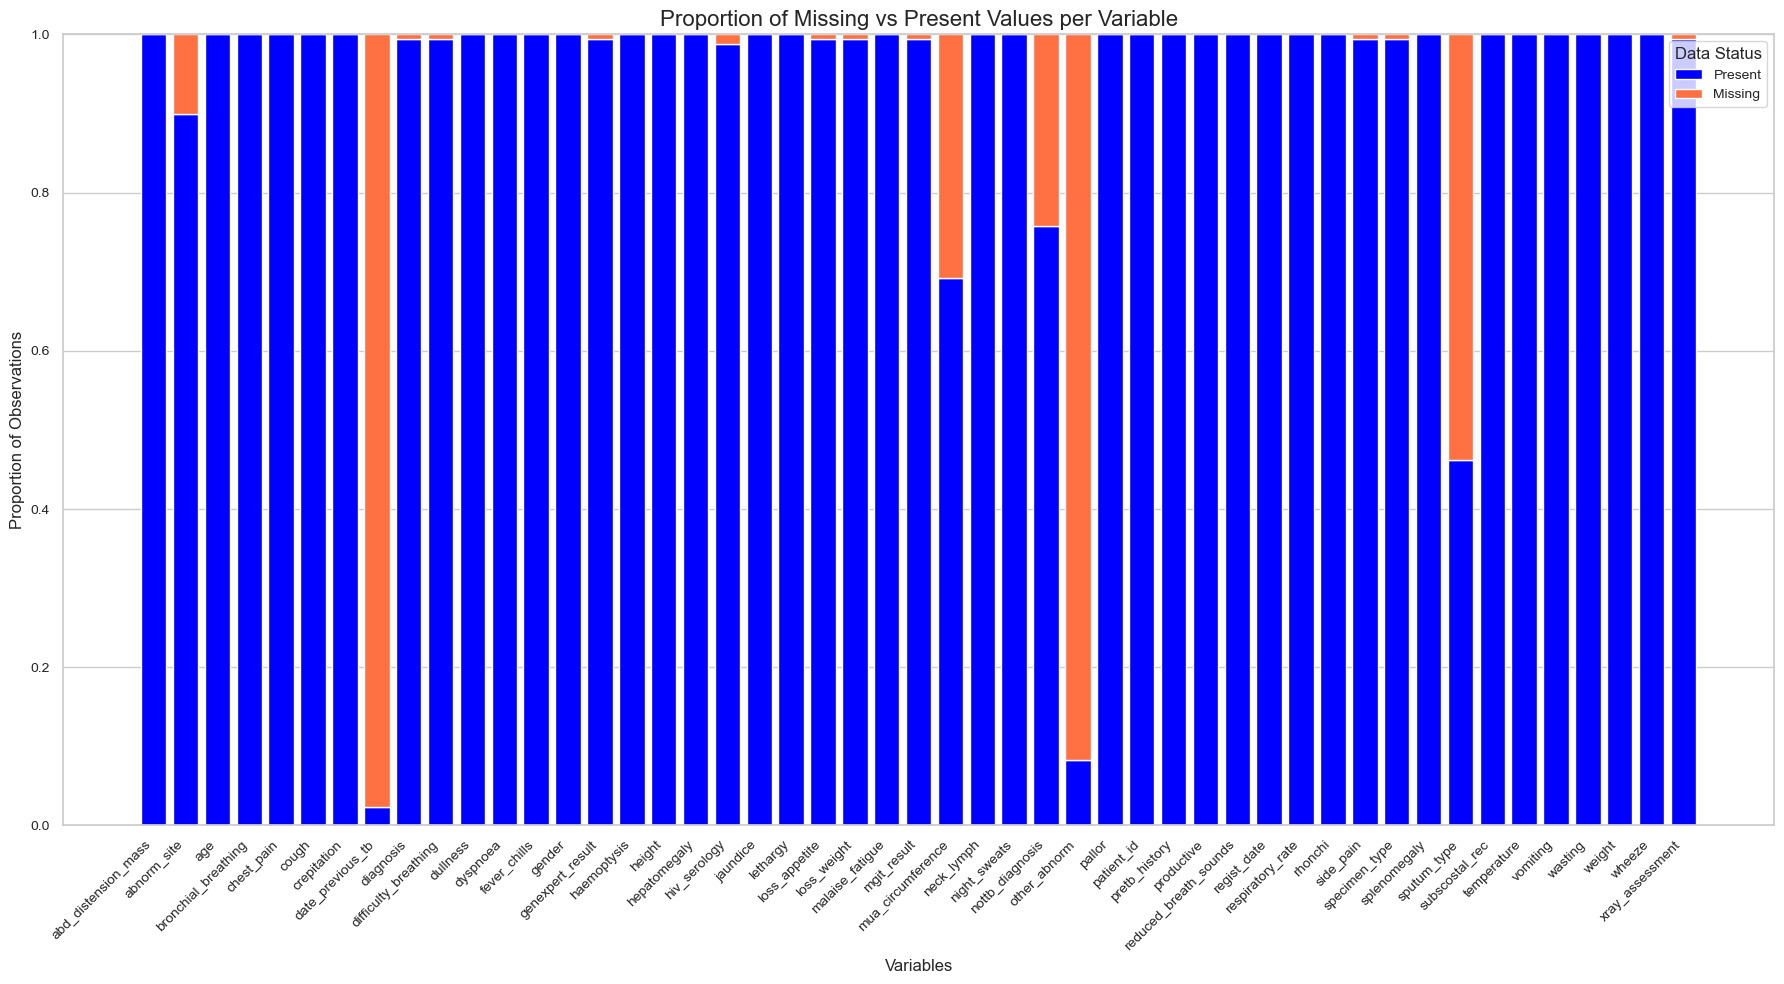

In [35]:
# Total number of rows
n = len(df)

# Calculate proportion of missing and present values
proportion_df = pd.DataFrame({
    'Variable': df.columns,
    'Missing': df.isnull().sum().values / n,
    'Present': df.notnull().sum().values / n
})

# Convert to long format
df_long = proportion_df.melt(id_vars='Variable', 
                             value_vars=['Present', 'Missing'],
                             var_name='Status', value_name='Proportion')

# Plot
plt.figure(figsize=(18, 10))
sns.set(style="whitegrid")

# Stacked vertical bars: first present, then missing on top
# Create a pivot table to compute stacked bars manually
pivot = df_long.pivot(index='Variable', columns='Status', values='Proportion').fillna(0)
bottom = pivot['Present']

# Plot present values
plt.bar(pivot.index, pivot['Present'], color='blue', label='Present')

# Plot missing values
plt.bar(pivot.index, pivot['Missing'], bottom=bottom, color='#FF7043', label='Missing')

# Aesthetics
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Proportion of Observations', fontsize=12)
plt.xlabel('Variables', fontsize=12)
plt.title('Proportion of Missing vs Present Values per Variable', fontsize=16)
plt.legend(title='Data Status', fontsize=10, loc='upper right')
plt.tight_layout()

In [36]:
# Drop missing values in 'diagnosis'
df = df.dropna(subset=['diagnosis'])

# Percentage of missing values for each column.
missing_percentages = df.isnull().sum() / len(df) * 100

# Columns with more than 70% missing values.
columns_to_drop = missing_percentages[missing_percentages > 20].index

# Drop these columns from the DataFrame in place.
df.drop(columns=columns_to_drop, inplace=True)

In [37]:
# Inspect Missing Values
missing_values = df.isnull().sum()
missing_proportions = missing_values / len(df )
missing_df = pd.concat([missing_values, missing_proportions], axis=1)

missing_df.columns = ['Number of Missing Values', 'Proportion of Missing Values']
missing_df = missing_df.sort_values('Proportion of Missing Values', ascending=False)

display(missing_df)

,Number of Missing Values,Proportion of Missing Values
abnorm_site,17,0.101190
side_pain,1,0.005952
loss_appetite,1,0.005952
hiv_serology,1,0.005952
loss_weight,1,0.005952
difficulty_breathing,1,0.005952
neck_lymph,0,0.000000
temperature,0,0.000000
weight,0,0.000000
height,0,0.000000


In [38]:
df.columns

Index(['patient_id', 'regist_date', 'gender', 'age', 'cough', 'productive',
       'chest_pain', 'wheeze', 'fever_chills', 'loss_weight',
       'difficulty_breathing', 'night_sweats', 'side_pain', 'malaise_fatigue',
       'loss_appetite', 'haemoptysis', 'vomiting', 'pretb_history', 'pallor',
       'splenomegaly', 'jaundice', 'hepatomegaly', 'wasting', 'dyspnoea',
       'lethargy', 'abd_distension_mass', 'neck_lymph', 'temperature',
       'weight', 'height', 'respiratory_rate', 'subscostal_rec', 'dullness',
       'crepitation', 'bronchial_breathing', 'rhonchi',
       'reduced_breath_sounds', 'abnorm_site', 'xray_assessment',
       'specimen_type', 'genexpert_result', 'mgit_result', 'hiv_serology',
       'diagnosis'],
      dtype='object')

The missing columns are:"country, previous_tb , specimen_result

antitb_treatment